___

<a href='http://www.pieriandata.com'><img src='../Pierian_Data_Logo.png'/></a>
___
<center><em>Copyright Pierian Data</em></center>
<center><em>For more information, visit us at <a href='http://www.pieriandata.com'>www.pieriandata.com</a></em></center>

# Quick Guide to Facebook's Prophet Basics
---
---

## IMPORTANT NOTE ONE:

**You should really read the papaer for Prophet! It is relatively straightforward and has a lot of insight on their techniques on how Prophet works internally!**

Link to paper: https://peerj.com/preprints/3190.pdf
---
---

## IMPORTANT NOTE TWO:

-----
------

* **NOTE: Link to installation instructions:** 
    * https://facebook.github.io/prophet/docs/installation.html#python 
    * SCROLL DOWN UNTIL YOU SEE THE ANACONDA OPTION AT THE BOTTOM OF THE PAGE.
    * YOU MAY NEED TO INSTALL BOTH **conda install gcc** and **conda install -c conda-forge fbprophet**
    * PLEASE READ THROUGH THE DOCS AND STACKOERFLOW CAREFULLY BEFORE POSTING INSTALLATION ISSUES TO THE QA FORUMS.

-----
----

## Load Libraries

In [39]:
# import pandas as pd
# from fbprophet import Prophet

In [40]:
import pandas as pd
from prophet import Prophet

## Load Data

The input to Prophet is always a dataframe with two columns: ds and y. The ds (datestamp) column should be of a format expected by Pandas, ideally YYYY-MM-DD for a date or YYYY-MM-DD HH:MM:SS for a timestamp. The y column must be numeric, and represents the measurement we wish to forecast.

In [41]:
df = pd.read_csv('../Data/BeerWineLiquor.csv')

In [3]:
df.head()

,date,beer
0,1/1/1992,1509
1,2/1/1992,1541
2,3/1/1992,1597
3,4/1/1992,1675
4,5/1/1992,1822


### Format the Data

In [42]:
df.columns = ['ds','y']

In [43]:
df['ds'] = pd.to_datetime(df['ds'])

## Create and Fit Model

In [44]:
# This is fitting on all the data (no train test split in this example)
m = Prophet()
m.fit(df)

17:16:50 - cmdstanpy - INFO - Chain [1] start processing
17:16:50 - cmdstanpy - INFO - Chain [1] done processing


## Forecasting

### Step 1: Create "future" placeholder dataframe

**NOTE: Prophet by default is for daily data. You need to pass a frequency for sub-daily or monthly data. Info: https://facebook.github.io/prophet/docs/non-daily_data.html**

In [45]:
future = m.make_future_dataframe(periods=24,freq = 'MS')

In [46]:
df.tail()

,ds,y
319,2018-08-01,4898
320,2018-09-01,4598
321,2018-10-01,4737
322,2018-11-01,5130
323,2018-12-01,6370


In [9]:
future.tail()

,ds
343,2020-08-01
344,2020-09-01
345,2020-10-01
346,2020-11-01
347,2020-12-01


In [10]:
len(df)

324

In [11]:
len(future)

348


### Step 2: Predict and fill in the Future

In [47]:
forecast = m.predict(future)

In [12]:
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,1992-01-01,1768.757900,1139.362784,1462.508740,1768.757900,1768.757900,-461.576825,-461.576825,-461.576825,-461.576825,-461.576825,-461.576825,0.0,0.0,0.0,1307.181075
1,1992-02-01,1771.752269,1180.107475,1497.357007,1771.752269,1771.752269,-426.727933,-426.727933,-426.727933,-426.727933,-426.727933,-426.727933,0.0,0.0,0.0,1345.024336
2,1992-03-01,1774.553453,1432.628931,1752.702744,1774.553453,1774.553453,-178.563269,-178.563269,-178.563269,-178.563269,-178.563269,-178.563269,0.0,0.0,0.0,1595.990184
3,1992-04-01,1777.547822,1416.120434,1740.953069,1777.547822,1777.547822,-196.216437,-196.216437,-196.216437,-196.216437,-196.216437,-196.216437,0.0,0.0,0.0,1581.331386
4,1992-05-01,1780.445599,1659.075881,1981.932489,1780.445599,1780.445599,44.656446,44.656446,44.656446,44.656446,44.656446,44.656446,0.0,0.0,0.0,1825.102045


In [13]:
forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
343,2020-08-01,5206.302586,5080.482955,5397.424028,5195.362348,5219.687271,39.479547,39.479547,39.479547,39.479547,39.479547,39.479547,0.0,0.0,0.0,5245.782132
344,2020-09-01,5222.461572,4929.171265,5267.322136,5210.300860,5236.889986,-133.685168,-133.685168,-133.685168,-133.685168,-133.685168,-133.685168,0.0,0.0,0.0,5088.776404
345,2020-10-01,5238.099301,5031.426800,5351.092065,5225.006983,5254.014432,-43.484866,-43.484866,-43.484866,-43.484866,-43.484866,-43.484866,0.0,0.0,0.0,5194.614435
346,2020-11-01,5254.258288,5184.487211,5514.295122,5240.171691,5271.428930,87.240725,87.240725,87.240725,87.240725,87.240725,87.240725,0.0,0.0,0.0,5341.499013
347,2020-12-01,5269.896017,6178.520126,6492.231556,5254.752055,5288.133447,1070.540063,1070.540063,1070.540063,1070.540063,1070.540063,1070.540063,0.0,0.0,0.0,6340.436080


In [14]:
forecast.columns

Index(['ds', 'trend', 'yhat_lower', 'yhat_upper', 'trend_lower', 'trend_upper',
       'additive_terms', 'additive_terms_lower', 'additive_terms_upper',
       'yearly', 'yearly_lower', 'yearly_upper', 'multiplicative_terms',
       'multiplicative_terms_lower', 'multiplicative_terms_upper', 'yhat'],
      dtype='object')

In [15]:
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(12)

,ds,yhat,yhat_lower,yhat_upper
336,2020-01-01,4633.697884,4472.573601,4803.007919
337,2020-02-01,4684.705762,4523.650175,4854.146199
338,2020-03-01,4947.986898,4785.935282,5111.776427
339,2020-04-01,4946.492717,4782.910216,5105.659281
340,2020-05-01,5203.003329,5041.600533,5361.659278
341,2020-06-01,5183.901435,5015.800989,5357.441018
342,2020-07-01,5316.244881,5149.900702,5476.822342
343,2020-08-01,5245.782132,5080.482955,5397.424028
344,2020-09-01,5088.776404,4929.171265,5267.322136
345,2020-10-01,5194.614435,5031.426800,5351.092065


### Plotting Forecast

We can use Prophet's own built in plotting tools

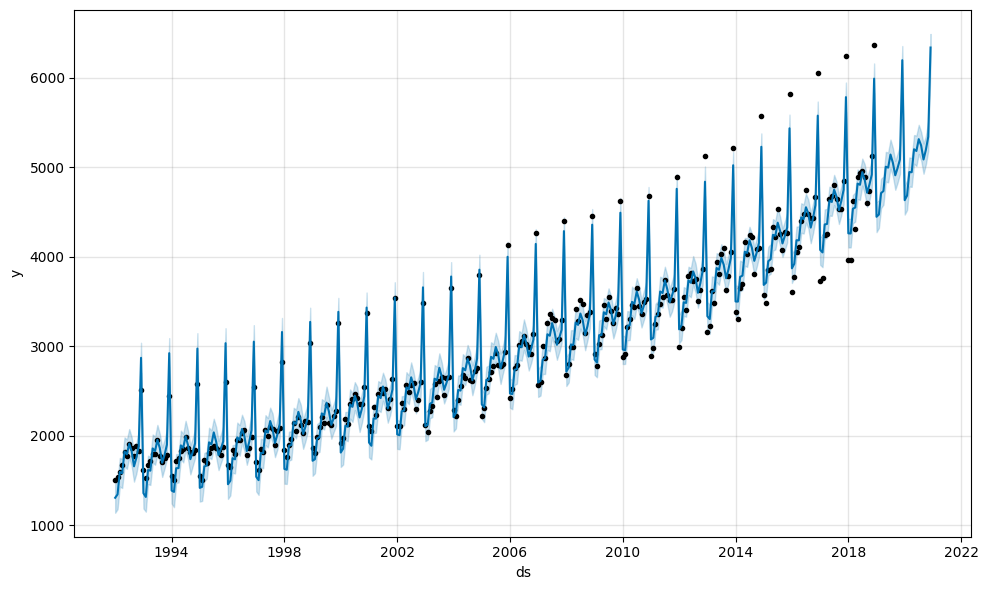

In [16]:
m.plot(forecast);

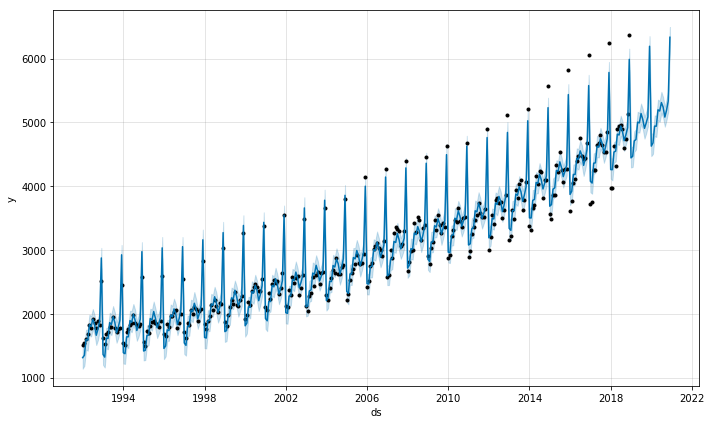

In [17]:
m.plot(forecast);

In [27]:
forecast.index=forecast.ds

In [26]:
forecast.ds

0     1992-01-01
1     1992-02-01
2     1992-03-01
3     1992-04-01
4     1992-05-01
         ...    
343   2020-08-01
344   2020-09-01
345   2020-10-01
346   2020-11-01
347   2020-12-01
Name: ds, Length: 348, dtype: datetime64[ns]

In [50]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,1992-01-01,1768.757900,1140.953103,1447.964000,1768.757900,1768.757900,-461.576825,-461.576825,-461.576825,-461.576825,-461.576825,-461.576825,0.0,0.0,0.0,1307.181075
1,1992-02-01,1771.752269,1185.414580,1494.184197,1771.752269,1771.752269,-426.727933,-426.727933,-426.727933,-426.727933,-426.727933,-426.727933,0.0,0.0,0.0,1345.024336
2,1992-03-01,1774.553453,1440.643958,1761.024623,1774.553453,1774.553453,-178.563269,-178.563269,-178.563269,-178.563269,-178.563269,-178.563269,0.0,0.0,0.0,1595.990184
3,1992-04-01,1777.547822,1426.475148,1732.789230,1777.547822,1777.547822,-196.216437,-196.216437,-196.216437,-196.216437,-196.216437,-196.216437,0.0,0.0,0.0,1581.331386
4,1992-05-01,1780.445599,1660.326926,1979.222060,1780.445599,1780.445599,44.656446,44.656446,44.656446,44.656446,44.656446,44.656446,0.0,0.0,0.0,1825.102045
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
343,2020-08-01,5206.302586,5092.142928,5393.189636,5192.789867,5218.125495,39.479547,39.479547,39.479547,39.479547,39.479547,39.479547,0.0,0.0,0.0,5245.782132
344,2020-09-01,5222.461572,4929.279738,5243.979993,5207.610294,5234.873944,-133.685168,-133.685168,-133.685168,-133.685168,-133.685168,-133.685168,0.0,0.0,0.0,5088.776404
345,2020-10-01,5238.099301,5026.705967,5351.463898,5222.143763,5251.481316,-43.484866,-43.484866,-43.484866,-43.484866,-43.484866,-43.484866,0.0,0.0,0.0,5194.614435
346,2020-11-01,5254.258288,5168.213596,5508.229601,5236.838879,5268.202546,87.240725,87.240725,87.240725,87.240725,87.240725,87.240725,0.0,0.0,0.0,5341.499013


(538.0, 623.0)

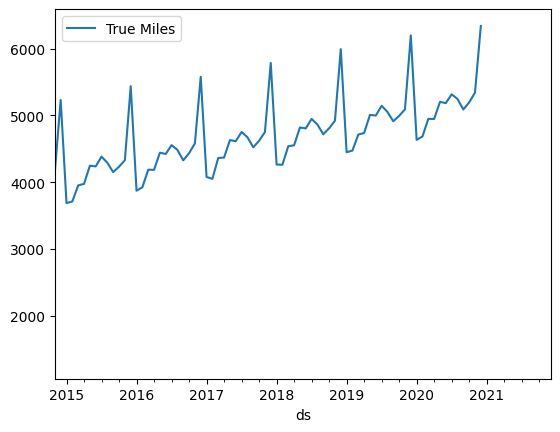

In [52]:
import matplotlib.pyplot as plt
%matplotlib inline
# m.plot(forecast,)
forecast.plot(x='ds',y='yhat',label='True Miles',legend=True)
plt.xlim(['2014-11-01','2021-12-01'])

(735234.0, 738156.0)

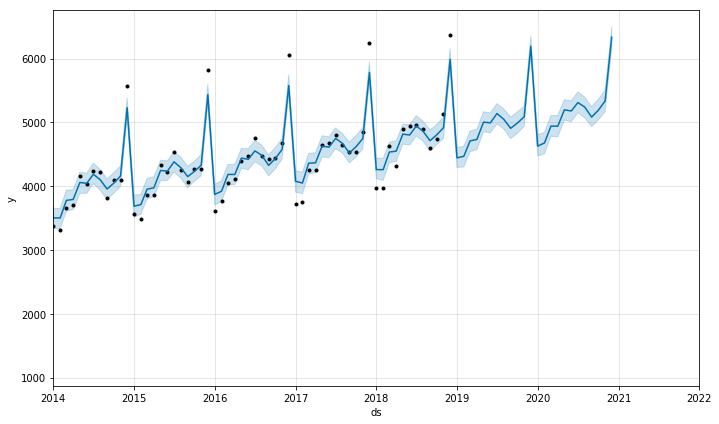

In [18]:
import matplotlib.pyplot as plt
m.plot(forecast)
plt.xlim('2014-01-01','2022-01-01')

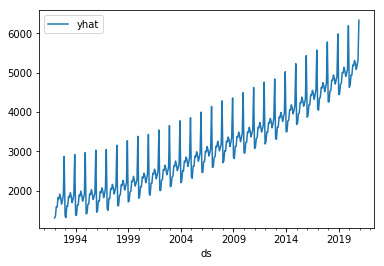

In [19]:
forecast.plot(x='ds',y='yhat')

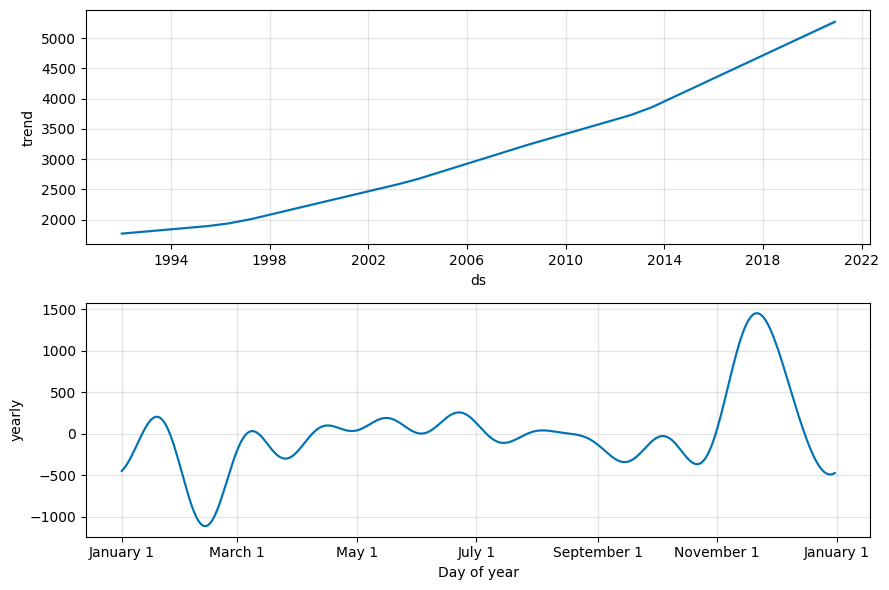

In [25]:
m.plot_components(forecast);


## Great Job!